# Sales Prediction

### Problem Statement
Build a model which predicts sales based on the money spent on different platforms for marketing.

#### Data
Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

### Import libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

### Read dataset

In [2]:
data = pd.read_csv("D:\My World\Machine Learning\Supervised learning\Regression\Linear Regression\Advertising.csv")

### Understanding data

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#Drop unnecessary data
data = data.drop('Unnamed: 0', axis = 1)

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


We can see that that TV advertising and sales are linearly related

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Data Cleaning

In [8]:
#Count null values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

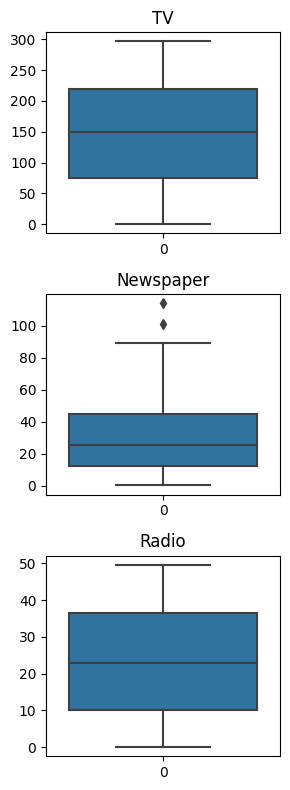

In [9]:
#Outlier analysis
fig, axs = plt.subplots(3, figsize = (3,8))
sns.boxplot(data['TV'], ax=axs[0]).set_title('TV')
sns.boxplot(data['Newspaper'], ax=axs[1]).set_title('Newspaper')
sns.boxplot(data['Radio'], ax=axs[2]).set_title('Radio')
plt.tight_layout()

### There is no significant outlier in the data

### Explanatory Data Analysis (EDA)

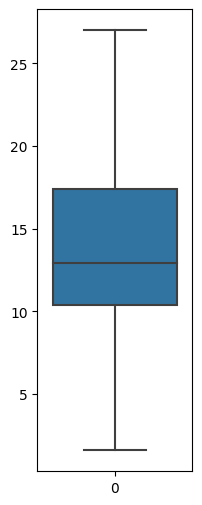

In [10]:
plt.subplots(figsize = (2,6))
sns.boxplot(data['Sales'])
plt.show()

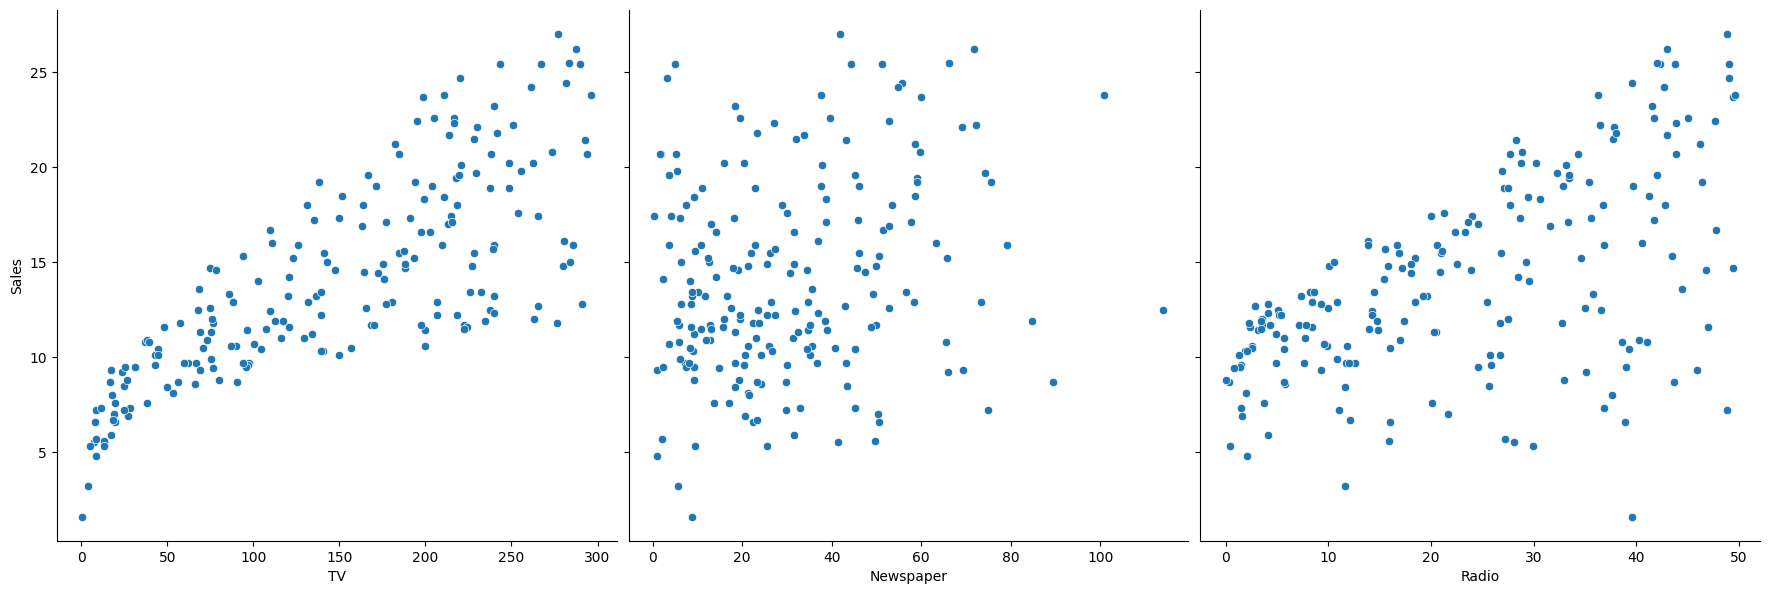

In [11]:
#Because there are more than 1 x-variables, we check to see how 
#sales are related with each of those variables using scatter plot
sns.pairplot(data,x_vars= ['TV', 'Newspaper', 'Radio'],
             y_vars= ['Sales'],size=6,kind='scatter')
plt.show()

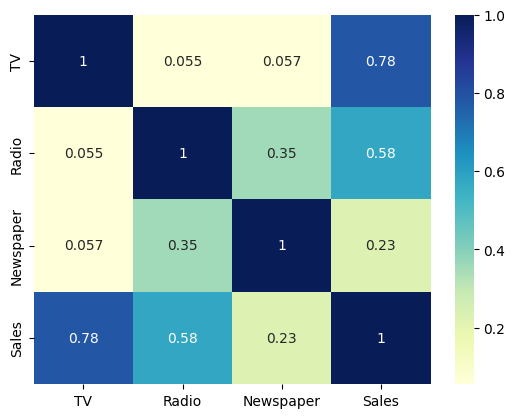

In [12]:
#Using the heatmap to see the correlation between different variables.
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [13]:
#Cooking data
X = data['TV'].to_numpy().reshape(-1, 1)
y = data['Sales'].to_numpy().reshape(-1, 1)

In [14]:
#Import segregating data form scikit learn
import sklearn
from sklearn.model_selection import train_test_split

In [15]:
#Split the data for train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# Fitting the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
#Predicting the sales for the test values
y_pred = lr.predict(X_test)

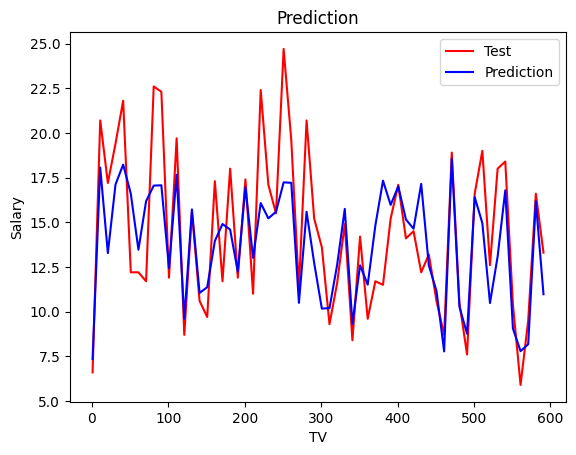

In [19]:
c = [i for i in range (1,len(y_test)*10+1,10)]
plt.plot(c,y_test,color='r', linestyle='-', label = 'Test')
plt.plot(c,y_pred,color='b',linestyle='-', label = 'Prediction')
plt.xlabel('TV')
plt.ylabel('Salary')
plt.title('Prediction')

plt.legend()
plt.show()

### Model evaluation
Looking at some key statistics from the summary
  The values we are concerned with are:
- The coefficients and significance (p-values)
- R-squared
- F statistic and its significance

In [20]:
#Intercept and coefficient of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: [6.98966586]
Coefficient of the line: [[0.04649736]]


In [21]:
#r-square score
from sklearn.metrics import r2_score
# Calculate the R-squared score

r_squared = r2_score(y_test, y_pred)
r_squared

0.5942987267783302

**1. The coefficient for TV is 0.054, with a very low p value**

The coefficient is statistically significant. So the association is not purely by chance.

**2. R - squared is 0.594**

Meaning that 59.4% of the variance in Sales is explained by TV

This is a decent R-squared value.

**3. F statistic has a very low p value (practically low)**

Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

In [22]:
X_train.shape

(140, 1)

In [24]:
y_train.shape

(140, 1)

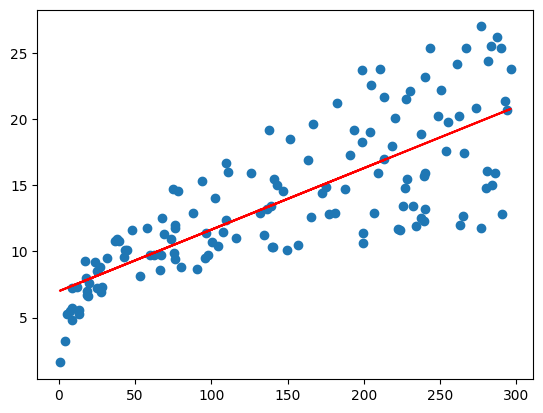

In [23]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.intercept_ + lr.coef_*X_train, 'r')
plt.show()